# 한글 폰트 설치

In [92]:
# 한글폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

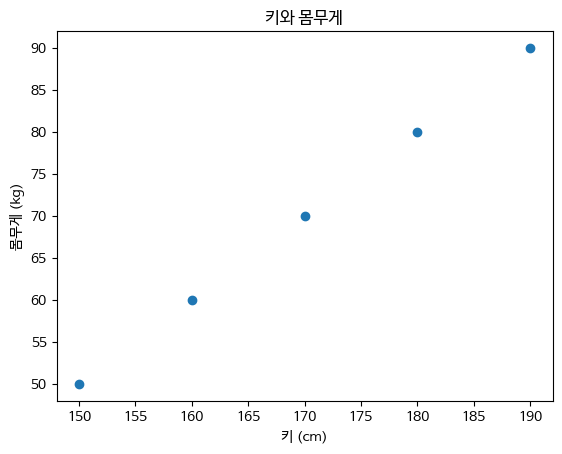

In [93]:
# 한글 표시 여부 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 예제 데이터
heights = [150, 160, 170, 180, 190]  # 키 (cm)
weights = [50, 60, 70, 80, 90]       # 몸무게 (kg)

# 산점도 그리기
plt.scatter(heights, weights)

# 제목 및 레이블 추가
plt.title("키와 몸무게")
plt.xlabel("키 (cm)")
plt.ylabel("몸무게 (kg)")

# 그래프 표시
plt.show()

# 외부에서 데이터 다운로드 및 확인

# 데이터 로드 및 토큰화

In [94]:
# !git clone git@github.com:songys/Chatbot_data.git

In [95]:
# 파일 읽기
import pandas as pd

# CSV 파일 경로 지정
file_path = "Chatbot_data/ChatbotData.csv" # 파일 경로 입력

# CSV 파일을 데이터프레임으로 불러오기
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df)

                             Q                         A  label
0                       12시 땡!                하루가 또 가네요.      0
1                  1지망 학교 떨어졌어                 위로해 드립니다.      0
2                 3박4일 놀러가고 싶다               여행은 언제나 좋죠.      0
3              3박4일 정도 놀러가고 싶다               여행은 언제나 좋죠.      0
4                      PPL 심하네                눈살이 찌푸려지죠.      0
...                        ...                       ...    ...
11818           훔쳐보는 것도 눈치 보임.        티가 나니까 눈치가 보이는 거죠!      2
11819           훔쳐보는 것도 눈치 보임.             훔쳐보는 거 티나나봐요.      2
11820              흑기사 해주는 짝남.                    설렜겠어요.      2
11821  힘든 연애 좋은 연애라는게 무슨 차이일까?  잘 헤어질 수 있는 사이 여부인 거 같아요.      2
11822               힘들어서 결혼할까봐        도피성 결혼은 하지 않길 바라요.      2

[11823 rows x 3 columns]


In [96]:
# 'Q' 컬럼의 데이터를 리스트로 옮기기
Q_column_list = df['Q'].tolist()
A_column_list = df['A'].tolist()

In [97]:
print(f'Q: {Q_column_list[0:100:20]}, 문장갯수: {len(Q_column_list)}')
print(f'A: {A_column_list[0:100:20]}, 문장갯수: {len(A_column_list)}')

Q: ['12시 땡!', '가스비 비싼데 감기 걸리겠어', '간만에 떨리니까 좋더라', '감정컨트롤을 못하겠어', '개강룩 입어볼까'], 문장갯수: 11823
A: ['하루가 또 가네요.', '따뜻하게 사세요!', '떨리는 감정은 그 자체로 소중해요.', '그건 습관이에요.', '개시해보세요.'], 문장갯수: 11823


In [98]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower() # 소문자 변환
    sentence = re.sub(r'[" "]+', " ", sentence) # 공백 제거
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣a-zA-Z0-9?.!,]+", " ", sentence) # 글자, 숫자, 구두점 외 특수문자 제거
    sentence = sentence.strip()

    return sentence

In [99]:
# 질의 응답 각 코퍼스별 전처리
Q_preprocessed = list(map(preprocess_sentence, Q_column_list))
A_preprocessed = list(map(preprocess_sentence, A_column_list))

print(f'Q: {Q_sentence[0:100:20]}, 문장갯수: {len(Q_sentence)}')
print(f'A: {A_sentence[0:100:20]}, 문장갯수: {len(A_sentence)}')

Q: ['12시 땡!', '가스비 비싼데 감기 걸리겠어', '간만에 떨리니까 좋더라', '감정컨트롤을 못하겠어', '개강룩 입어볼까'], 문장갯수: 11232
A: ['하루가 또 가네요.', '따뜻하게 사세요!', '떨리는 감정은 그 자체로 소중해요.', '그건 습관이에요.', '개시해보세요.'], 문장갯수: 11232


In [100]:
total_sentence_count = len(Q_preprocessed)
test_sentence_count = total_sentence_count // 20

print("Test Size: ", test_sentence_count)
print("\n")

Test Size:  591




In [101]:
# 학습/테스트 데이터 분리
Q_sentence = Q_preprocessed[:-test_sentence_count]
A_sentence = A_preprocessed[:-test_sentence_count]
test_Q_sentences = Q_preprocessed[-test_sentence_count:]
test_A_sentences = A_preprocessed[-test_sentence_count:]

In [102]:
# 한국어 관련 라이브러리
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [103]:
# 코퍼스 토큰화
from konlpy.tag import Mecab
from tqdm.notebook import tqdm

mecab = Mecab()
def make_corpus(sentences, tokenizer):
    corpus = []
    for sentence in tqdm(sentences):
        tokens = tokenizer.morphs(sentence)
        corpus.append(tokens)
    return corpus

# 예제 문장 리스트
Q_example = ["이것은 예제 문장입니다.", "형태소 분석을 시도해 봅시다."]
A_example = ["또 다른 예제 문장입니다.", "분석이 잘 되었으면 좋겠네요."]

Q_ex_tokenized = make_corpus(Q_example, mecab)
A_ex_tokenized = make_corpus(A_example, mecab) 

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [104]:
(Q_ex_tokenized, A_ex_tokenized)

([['이것', '은', '예제', '문장', '입니다', '.'],
  ['형태소', '분석', '을', '시도', '해', '봅시다', '.']],
 [['또', '다른', '예제', '문장', '입니다', '.'],
  ['분석', '이', '잘', '되', '었', '으면', '좋', '겠', '네요', '.']])

In [105]:
Q_tokenized = make_corpus(Q_sentence, mecab)
A_tokenized = make_corpus(A_sentence, mecab) 

  0%|          | 0/11232 [00:00<?, ?it/s]

  0%|          | 0/11232 [00:00<?, ?it/s]

In [106]:
(Q_tokenized[0:100:20], A_tokenized[0:100:20])

([['12', '시', '땡', '!'],
  ['가스', '비', '비싼데', '감기', '걸리', '겠', '어'],
  ['간만에', '떨리', '니까', '좋', '더라'],
  ['감정', '컨트롤', '을', '못', '하', '겠', '어'],
  ['개강', '룩', '입', '어', '볼까']],
 [['하루', '가', '또', '가', '네요', '.'],
  ['따뜻', '하', '게', '사세요', '!'],
  ['떨리', '는', '감정', '은', '그', '자체', '로', '소중', '해요', '.'],
  ['그건', '습관', '이', '에요', '.'],
  ['개시', '해', '보', '세요', '.']])

# 어휘 대체(Lexical Substitution)을 통한 데이터 증강

[한국어 사전 훈련된 다운로드 링크](https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg)

[위 링크가 포함된 워드 벡터 깃헙저장소](https://github.com/Kyubyong/wordvectors)

In [107]:
from gensim.models import KeyedVectors

# 한국어 사전훈련 모델 저장소로부터, FastText 형식의 벡터파일을 다운로드하였음
# 사전 훈련된 FastText 모델의 경로를 지정합니다.
model_path = 'ko.vec'

# 모델을 로드합니다.
model = KeyedVectors.load_word2vec_format(model_path, binary=False)

In [108]:
# 모델을 사용하여 단어 벡터를 얻습니다. 예를 들어, '사랑'이라는 단어에 대한 벡터를 조회합니다.
word_vector = model['사랑']

print(word_vector)

[ 7.2242e-02 -6.9223e-02  2.6350e-01  2.6930e-02  2.7465e-01 -5.7484e-02
  1.1657e-01 -1.0736e-01  2.6542e-01 -1.5600e-01  4.8601e-01  6.3728e-01
  5.7949e-01  2.1420e-01 -3.2206e-02 -9.1503e-03  2.0928e-01 -8.1857e-02
 -2.6783e-01 -2.5602e-01  1.4733e-01  4.5259e-01  3.6965e-01  2.4644e-01
 -4.4918e-02 -6.7232e-02  3.1724e-02  3.3469e-01  2.6623e-01 -1.1605e-01
 -1.5161e-02  1.0318e-01  1.4193e-01 -7.9796e-02  1.5111e-02  1.0474e-01
 -2.3739e-01 -1.1473e-01 -5.4767e-02  8.9843e-02  3.1133e-01  3.2850e-01
  9.2288e-02 -1.3007e-01 -4.7345e-01 -4.1861e-01 -2.1817e-01 -1.6687e-02
  3.4634e-01  1.1898e-01  2.5232e-01  5.3454e-03  9.8491e-02  1.4123e-01
  2.8660e-02 -1.1567e-01  5.5575e-01 -1.4759e-01  2.7344e-01 -2.9719e-01
  7.8230e-02 -2.1698e-01 -1.9905e-01  3.0314e-01 -4.5031e-02  1.6996e-01
 -3.5892e-01 -2.6847e-01  1.4510e-01 -2.0968e-01 -1.1155e-01 -2.4789e-01
  7.3840e-02 -1.5958e-01 -5.4518e-01 -2.1918e-01  4.6502e-01 -4.5190e-01
 -3.0823e-02 -5.2310e-02 -3.0539e-01 -3.2815e-01  4

In [109]:
similar_word = model.most_similar('사랑')
similar_word

[('사랑과', 0.6912475228309631),
 ('그리움', 0.66273033618927),
 ('이별', 0.6524810194969177),
 ('그대', 0.649117112159729),
 ('연인', 0.6449648141860962),
 ('슬픔', 0.6445863246917725),
 ('외로움', 0.6422537565231323),
 ('사랑이', 0.6219196915626526),
 ('첫사랑', 0.6168366074562073),
 ('애정', 0.6153576970100403)]

In [110]:
import random

def lexical_sub(sentence, word_vectors):
    """
    문장의 임의의 단어를 유사한 단어로 대체합니다.
    
    :param sentence: 원본 문장 (string)
    :param word_vectors: word2vec 모델의 word vectors
    :return: 변형된 문장 (string)
    """
    selected_tok = random.choice(sentence)

    result = ""
    for tok in sentence:
        if tok == selected_tok:
            # 선택된 토큰에 대한 유사한 단어 찾기
            try:
                # 유사한 단어로 대체
                similar_word = word_vectors.most_similar(tok)[0][0]
                result += similar_word + " "
            except KeyError:
                # 단어가 word2vec 모델에 없는 경우, 원본 단어를 사용
                result += tok + " "
        else:
            result += tok + " "

    return result.strip()

In [111]:
# 예시 사용
sample_sentence = Q_tokenized[10000]

augmented_sentence = lexical_sub(sample_sentence, model)
print("From:", sample_sentence)
print("To:", augmented_sentence)

From: ['사랑', '한다고', '말', '해', '주', '면', '뭐', '가', '덧나', '나']
To: 사랑과 한다고 말 해 주 면 뭐 가 덧나 나


In [112]:
def apply_lexical_substitution(Q_tokenized, model):
    augmented_sentences = []  # 결과를 저장할 리스트

    for sample_sentence in tqdm(Q_tokenized, desc="Applying Lexical Substitution"):
        # 각 문장에 대해 lexical_sub 함수를 적용
        augmented = lexical_sub(sample_sentence, model)
        # 결과를 augmented_sentences 리스트에 추가
        augmented_sentences.append(augmented)

    return augmented_sentences
    
# 함수 사용
augmented_Q = apply_lexical_substitution(Q_tokenized, model)
augmented_A = apply_lexical_substitution(A_tokenized, model)

Applying Lexical Substitution:   0%|          | 0/11232 [00:00<?, ?it/s]

Applying Lexical Substitution:   0%|          | 0/11232 [00:00<?, ?it/s]

In [113]:
list(map(lambda x: len(x), [Q_tokenized, augmented_Q, A_tokenized, augmented_A]))

[11232, 11232, 11232, 11232]

In [114]:
Q_tokenized

[['12', '시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌', '어'],
 ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'],
 ['3', '박', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'],
 ['ppl', '심하', '네'],
 ['sd', '카드', '망가졌', '어'],
 ['sd', '카드', '안', '돼'],
 ['sns', '맞', '팔', '왜', '안', '하', '지'],
 ['sns', '시간', '낭비', '인', '거', '아', '는데', '매일', '하', '는', '중'],
 ['sns', '시간', '낭비', '인데', '자꾸', '보', '게', '됨'],
 ['sns', '보', '면', '나', '만', '빼', '고', '다', '행복', '해', '보여'],
 ['가끔', '궁금', '해'],
 ['가끔', '뭐', '하', '는지', '궁금', '해'],
 ['가끔', '은', '혼자', '인', '게', '좋', '다'],
 ['가난', '한', '자', '의', '설움'],
 ['가만', '있', '어도', '땀', '난다'],
 ['가상', '화폐', '쫄딱', '망함'],
 ['가스', '불', '켜', '고', '나갔', '어'],
 ['가스', '불', '켜', '놓', '고', '나온', '거', '같', '아'],
 ['가스', '비', '너무', '많이', '나왔', '다', '.'],
 ['가스', '비', '비싼데', '감기', '걸리', '겠', '어'],
 ['가스', '비', '장난', '아님'],
 ['가장', '확실', '한', '건', '뭘까', '?'],
 ['가족', '여행', '가', '기', '로', '했', '어'],
 ['가족', '여행', '고고'],
 ['가족', '여행', '어디', '로', '가', '지', '?'],
 ['가족', '있', '어', '?'],
 [

In [115]:
syn_Q = Q_tokenized + augmented_Q + Q_tokenized
syn_A = A_tokenized + A_tokenized + augmented_A

len(syn_Q), len(syn_A)

(33696, 33696)

# 데이터 벡터화

In [116]:
# 아래와 같이 코퍼스 전체에 시작 및 종료 토큰 추가
sample_data = ["12", "시", "땡", "!"]

print(["<start>"] + sample_data + ["<end>"])

['<start>', '12', '시', '땡', '!', '<end>']


In [117]:
data = ['시', '땡', '!']
data_added = ["<start>"] + data + ["<end>"]
data_added

['<start>', '시', '땡', '!', '<end>']

In [118]:
# 시작 및 종료 토큰을 추가하는 함수
def add_tokens(data):
    # 새로운 빈 리스트 생성
    result = []
    # tqdm을 사용하여 진행 상황을 표시
    for sentence in tqdm(data, desc="Adding Tokens"):
        sentence_list = list(sentence)  # 문자열을 리스트로 변환
        if sentence_list[0] != "<start>":
            sentence_list.insert(0, "<start>")  # 시작 토큰 추가
        if sentence_list[-1] != "<end>":
            sentence_list.append("<end>")  # 종료 토큰 추가
        result.append(sentence_list)
    return result

# syn_Q와 syn_A에 함수 적용
processed_syn_Q = add_tokens(syn_Q)
processed_syn_A = add_tokens(syn_A)

Adding Tokens:   0%|          | 0/33696 [00:00<?, ?it/s]

Adding Tokens:   0%|          | 0/33696 [00:00<?, ?it/s]

In [119]:
# 결과 출력 (옵션)
print(processed_syn_Q[100])
print(processed_syn_A[100])

['<start>', '거지', '됐', '어', '<end>']
['<start>', '밥', '사', '줄', '친구', '를', '찾', '아', '보', '세요', '<end>']


In [156]:
# 단어 임베딩 층 정의
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# syn_Q와 syn_A를 결합
combined_data = processed_syn_Q + processed_syn_A

# Tokenizer를 사용하여 단어 사전을 구축하고 단어 사전의 크기를 10,000으로 제한
vocab_size = 10000
TOKENIZER = Tokenizer(num_words=vocab_size, filters='', oov_token="<oov>")
TOKENIZER.fit_on_texts(combined_data)

# 문장을 숫자 시퀀스로 변환
sequences_Q = TOKENIZER.texts_to_sequences(processed_syn_Q)
sequences_A = TOKENIZER.texts_to_sequences(processed_syn_A)

# 패딩을 추가하여 시퀀스의 길이를 50으로 맞춥니다.
MAX_LEN = 50
enc_train = pad_sequences(sequences_Q, maxlen=MAX_LEN, padding='post')
dec_train = pad_sequences(sequences_A, maxlen=MAX_LEN, padding='post')

# enc_train과 dec_train을 출력합니다.
print("enc_train shape:", enc_train.shape)
print("dec_train shape:", dec_train.shape)
print("Vocabulary size:", vocab_size)

enc_train shape: (33696, 50)
dec_train shape: (33696, 50)
Vocabulary size: 10000


In [157]:
# index_word 사전 생성
index_word = {i: word for word, i in TOKENIZER.word_index.items()}

# 숫자 시퀀스를 문장으로 변환하는 함수
def sequence_to_text(sequence):
    return ' '.join([index_word.get(i, '?') for i in sequence])

# 예시 데이터 포인트 변환
sample_index = 10  # 예시 인덱스, 이 값을 변경하여 다른 데이터 포인트를 선택할 수 있습니다.
sample_sequence_Q = enc_train[sample_index]
sample_sequence_A = dec_train[sample_index]

# 변환된 문장 출력
print("Original Sequence Q:", sample_sequence_Q)
print("Decoded Text Q:", sequence_to_text(sample_sequence_Q))
print("\nOriginal Sequence A:", sample_sequence_A)
print("Decoded Text A:", sequence_to_text(sample_sequence_A))


Original Sequence Q: [  3 909  18  31  17  42 827  13  22 265  15 828   4   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Decoded Text Q: <start> sns 보 면 나 만 빼 고 다 행복 해 보여 <end> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

Original Sequence A: [   3 3346    7    8 1196  443    5    4    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Decoded Text A: <start> 자랑 하 는 자리 니까요 . <end> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [122]:
import tensorflow as tf
# 배치 사이즈 및 입력데이터 텐서화
BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train)).batch(batch_size=BATCH_SIZE)

# 훈련

## 예문
1. 지루하다, 놀러가고 싶어.
2. 오늘 일찍 일어났더니 피곤하다.
3. 간만에 여자친구랑 데이트 하기로 했어.
4. 집에 있는다는 소리야.

---

## 제출

Translations
> 1. 잠깐 쉬 어도 돼요 . <end>
> 2. 맛난 거 드세요 . <end>
> 3. 떨리 겠 죠 . <end>
> 4. 좋 아 하 면 그럴 수 있 어요 . <end>

Hyperparameters
> n_layers: 1
> d_model: 368
> n_heads: 8
> d_ff: 1024
> dropout: 0.2

Training Parameters
> Warmup Steps: 1000
> Batch Size: 64
> Epoch At: 10

In [123]:
import numpy as np
# 포지셔널 인코딩
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2*(i//2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]
        
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    
    return sinusoid_table

# 마스크 생성 함수

def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask

# 멀티헤드 어텐션
# Multi Head Attention 구현
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions

    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x
    
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
                        
        out = self.combine_heads(out)
        out = self.linear(out)
            
        return out, attention_weights

# Position-wise Feed Forward Network 구현
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
            
        return out

In [124]:
# 인코더 레이어
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        '''
        Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual
        
        return out, enc_attn

# 디코더 레이어
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        '''
        Masked Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        '''
        Multi-Head Attention
        '''
        residual = out
        out = self.norm_2(out)
        # Q, K, V 순서에 주의하세요!
        out, dec_enc_attn = self.enc_dec_attn(Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

# 인코더
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
    
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns

# 디코더
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, dec_enc_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

In [125]:
# 전체 모델
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [126]:
# 모델 인스턴스 생성
transformer = Transformer(
    n_layers=1,
    d_model=368,
    n_heads=8,
    d_ff=1024,
    src_vocab_size=vocab_size,
    tgt_vocab_size=vocab_size,
    pos_len=200,
    dropout=0.2,
    shared_fc=True,
    shared_emb=True)

d_model = 368

In [127]:
# 학습 스케쥴러
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=1000):
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32) # step을 float32로 변환
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [128]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [129]:
# 훈련 단계 정의

@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [130]:
# 학습율과 최적화 도구
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

# 손실함수 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [131]:
EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0

    dataset_count = tf.data.experimental.cardinality(train_dataset).numpy()
    tqdm_bar = tqdm(total=dataset_count)
    
    for (batch, (src, tgt)) in enumerate(train_dataset):
        batch_loss, _, _, _ = train_step(src, tgt, transformer, optimizer)  # 첫 번째 요소만 추출
        total_loss += batch_loss
        
        # 진행률 표시 갱신
        tqdm_bar.update(1)
        tqdm_bar.set_postfix(Batch_loss=batch_loss.numpy(), Avg_loss=(total_loss / (batch + 1)))
    
    tqdm_bar.close()
    print(f"에포크 {epoch + 1}: 평균 손실 = {total_loss / dataset_count}")
    transformer.save_weights(f"model_checkpoint_epoch_{epoch + 1}.h5")

  0%|          | 0/527 [00:00<?, ?it/s]

에포크 1: 평균 손실 = 3.914339542388916


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 2: 평균 손실 = 2.6461057662963867


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 3: 평균 손실 = 2.0870895385742188


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 4: 평균 손실 = 1.5431286096572876


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 5: 평균 손실 = 1.1386432647705078


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 6: 평균 손실 = 0.8715028762817383


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 7: 평균 손실 = 0.6809173822402954


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 8: 평균 손실 = 0.5388385653495789


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 9: 평균 손실 = 0.4346868097782135


  0%|          | 0/527 [00:00<?, ?it/s]

에포크 10: 평균 손실 = 0.35510218143463135


# 성능 측정

- BLEU Score를 계산하는 calculate_bleu() 함수도 적용

In [158]:
# 번역 함수
# TensorFlow Tokenizer용 bos_id, eos_id 가져오기
bos_id = TOKENIZER.word_index['<start>']
eos_id = TOKENIZER.word_index['<end>']

# TensorFlow Tokenizer용 decode_ids 함수
def decode_ids(tokenizer, sequence):
    return tokenizer.sequences_to_texts([sequence])[0]
    
def translate(tokens, model, src_tokenizer, tgt_tokenizer):
    padded_tokens = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=MAX_LEN,
                                                           padding='post')
    ids = []
    output = tf.expand_dims([bos_id], 0)
    for i in range(MAX_LEN):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(padded_tokens, output)

        predictions, _, _, _ = model(padded_tokens, 
                                      output,
                                      enc_padding_mask,
                                      combined_mask,
                                      dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if eos_id == predicted_id: 
            result = decode_ids(tgt_tokenizer, ids) 
            return result

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    result = decode_ids(tgt_tokenizer, ids) 
    return result

In [176]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

# BLEU 점수 계산 함수 수정
def eval_bleu_single(model, src_sentence, tgt_sentence, src_tokenizer, tgt_tokenizer, mecab, verbose=True):
    # Mecab을 사용한 토크나이징
    src_tokens_mecab = mecab.morphs(src_sentence)
    tgt_tokens_mecab = mecab.morphs(tgt_sentence)
    
    # 시작 및 종료 토큰 추가
    src_sentence = "<start> " + src_sentence + " <end>"
    tgt_sentence = "<start> " + tgt_sentence + " <end>"

    # TensorFlow Tokenizer를 사용한 숫자 시퀀스 변환
    src_tokens = src_tokenizer.texts_to_sequences([' '.join(src_tokens_mecab)])[0]
    tgt_tokens = tgt_tokenizer.texts_to_sequences([' '.join(tgt_tokens_mecab)])[0]

    if (len(src_tokens) > MAX_LEN): return None
    if (len(tgt_tokens) > MAX_LEN): return None

    reference_mecab = ' '.join(tgt_tokens_mecab)  # Mecab으로 토크나이즈된 참조 문장
    reference = tgt_sentence.split()
    candidate = translate(src_tokens, model, src_tokenizer, tgt_tokenizer).split()

    score = sentence_bleu([reference], candidate,
                          smoothing_function=SmoothingFunction().method1)

    if verbose:
        print("Source Sentence: ", src_sentence)
        print("Model Prediction: ", candidate)
        print("Real (Tokenized): ", reference_mecab)  # 수정된 부분
        print("Real (Original): ", reference)
        print("Score: %lf\n" % score)

    return score

In [180]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 10

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 좋아하는 여자한테 선물해도 괜찮을까? <end>
Model Prediction:  ['사', '람', '마', '다', '다', '르', '겠', '지', '만', '괜', '찮', '아', '요', '.']
Real (Tokenized):  좋 아 할 거 예요 .
Real (Original):  ['<start>', '좋아할', '거예요.', '<end>']
Score: 0.000000



0

In [178]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 50

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 좋아했던 사람도 금방 잊을 수 있을까. <end>
Model Prediction:  ['좋', '은', '사', '람', '에', '대', '한', '시', '간', '이', '필', '요', '한', '거', '예', '요', '.']
Real (Tokenized):  아무래도 시간 이 필요 하 겠 죠 .
Real (Original):  ['<start>', '아무래도', '시간이', '필요하겠죠.', '<end>']
Score: 0.000000



0

In [181]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 100

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 짝남 관련 악몽을 꿔. <end>
Model Prediction:  ['복', '소', '중', '해', '요', '.']
Real (Tokenized):  안 좋 은 일 이 라도 있 었 나 봐요 .
Real (Original):  ['<start>', '안좋은', '일이라도', '있었나봐요.', '<end>']
Score: 0.000000



0

In [182]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 150

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 짝남이 나한테 여지준 것 같아. <end>
Model Prediction:  ['인', '고', '마', '음', '고', '치', '지', '마', '요', '<', '/', 's', '>']
Real (Tokenized):  오해 가 아니 라면 나쁜 분 이 네요 .
Real (Original):  ['<start>', '오해가', '아니라면', '나쁜', '분이네요.', '<end>']
Score: 0.000000



0

In [183]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 200

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 짝남이랑 저녁에 보기로 했는데 연락이 없다. <end>
Model Prediction:  ['즐', '거', '운', '사', '랑', '하', '는', '고', '인', '가', '봐', '요', '.']
Real (Tokenized):  한 번 만 더 연락 해 보 는 건 어떨까 요 .
Real (Original):  ['<start>', '한', '번만', '더', '연락해보는', '건', '어떨까요.', '<end>']
Score: 0.000000



0

In [184]:
# Q. 인덱스를 바꿔가며 테스트해 보세요
test_idx = 250

eval_bleu_single(transformer, 
                 test_Q_sentences[test_idx], 
                 test_A_sentences[test_idx], 
                 TOKENIZER,
                 TOKENIZER,
                 mecab)

Source Sentence:  <start> 짝녀 오랫동안 멀리서 지켜보기만 하고 있습니다. <end>
Model Prediction:  ['고', '백', '해', '보', '는', '게', '좋', '고', '것', '같', '네', '요', '.']
Real (Tokenized):  뒤 에서 만 지켜보 는 게 힘들 었 겠 어요 .
Real (Original):  ['<start>', '뒤에서만', '지켜보는게', '힘들었겠어요.', '<end>']
Score: 0.000000



0